# Домашнее задание 9

(прислать до 02:00 13.11.2018)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 
Если возникает ошибка, то я сообщаю Вам об этом и жду исправленного решения, которое будет удовлетворять указанному требованию.

## Задача 1

Пусть $\varphi: \mathbb{R} \to \mathbb{R}$ возрастающая и выпуклая функция. Также $f: \mathbb{R}^n \to \mathbb{R}$ выпуклая, следовательно $g(x) = \varphi(f(x))$ также выпуклая функция. Также пусть $f$ и $g$ дважды диференцируемы.

- Как связаны между собой задачи минимизации $f$ и $g$?
- Сравните градиентный метод и метод Ньютона для решения задач минимизации $f$ и $g$. Как связаны направления, получаемые каждым из методов? Как связаны методы в случае использования наискорейшего спуска для выбора шага?

- Для выпуклых функций условие первого порядка является достаточным. Отсюда $\arg\min\limits_{x} g(x)= x^{*}: (\phi(f(x^{*})))' = \phi'(f(x^{*})) \nabla f(x^{*})^{\top} = 0 $. Из условия возрастания получаем $\phi'(f(x)) \geqslant 0$. Если $ \phi'(f(x)) \gneq 0 $, то $ \arg\min\limits_{x} g(x) = \arg\min\limits_{x} f(x) $, иначе $ \arg\min\limits_{x} g(x) = \{x\ |\ \exists c: \phi'(c) = 0,\ f(x) = c \} \cup \arg\min\limits_{x} f(x) $  
Отсюда следует, что для минимизации $g(x)$ необходимо минимизировать $f(x)$ (но не всегда достаточно).
- **Градиентный спуск:** В каждой точке направления наискорейшего убывания будут пропорциональны. Отсюда при подборе шага методом наискорейшего шага последовательности точек будут одинаковыми.
  $$  
    \begin{aligned}
    &f(x): x_{k+1} = x_{k} - \alpha_{k} \nabla f(x_k)^{\top}\\
    &g(x): x_{k+1} = x_{k} - \beta_{k} \nabla g(x)^{\top} = x_{k} - \beta_{k} \phi'(f(x_k)) \nabla f(x_k)^{\top}
    \end{aligned}
  $$
  **Метод Ньютона:** 
  $$
    f(x):  x_{k+1} = x_{k} - \left(\nabla^{2} f(x_k)\right)^{-1} \nabla f(x_k)^{\top}\\
    g(x):  x_{k+1} = x_{k} - \left(\nabla^{2} g(x_k)\right)^{-1} \nabla g(x_k)^{\top}
  $$
  Распишем вторую строку:
  $$
       \nabla^{2} g(x) = \nabla f(x)^{\top} \phi''(f(x)) \nabla f(x) + \phi'(f(x)) \nabla^2 f(x)\\
     \begin{aligned}
       x_{k+1} &= x_{k} - \left(\nabla f(x_k)^{\top} \phi''(f(x_k)) \nabla f(x_k) + \phi'(f(x_k)) \nabla^2 f(x_k)\right)^{-1} \phi'(x_k) \nabla f(x_k)^{\top}\\
       &= x_{k} - \left(\nabla f(x_k)^{\top} \frac{\phi''(f(x_k))}{\phi'(f(x_k))} \nabla f(x_k) + \nabla^2 f(x_k)\right)^{-1} \nabla f(x_k)^{\top}
    \end{aligned}
  $$
  Отсюда тяжело судить о наличии какой-либо связи между направлениями, в отличие от предыдущего метода.

# Место для Вашего решения

## Задача 2

Для задачи
$$
\ln (e^x + e^{-x}) \to \min
$$
запустите метод Ньютона с постоянным шагом $\alpha = 1$ из точки $x_0 = 1$ и $x_0 = 1.1$. Что Вы заметили и почему?
А что произойдёт, если использовать демпфированный метод Ньютона? Почему?
Постройте графики сходимости для каждой постановки эксперимента и оцените время работы каждого метода.
При сравнении сходимости для разных условий стройте линии на одном графике и добавляйте легенду, иначе очень сложно понять, что происходит.
Также для сравнения сходимости достаточно указывать изменение нормы градиента, чтобы не загромождать рисунок.

$$
    f(x) := \ln(e^x + e^{-x}) = \ln (2\cosh(x)) \\
    \nabla f(x) = \frac{\sinh(x)}{\cosh(x)} = \tanh(x)\\
    \nabla^2 f(x) = \cosh^{-2}(x)
$$

In [62]:
from collections import defaultdict
from functools import partial
import liboptpy.base_optimizer as base
import liboptpy.unconstr_solvers.so as so
import liboptpy.step_size as ss
import numpy as np
import matplotlib.pyplot as plt
%autosave 15
%matplotlib notebook
np.ALLOW_THREADS = True

Autosaving every 15 seconds


In [59]:
def plot_convergence_1d(func, steps, title="Successive Newton's method estimates", arrow_kwargs={}):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.set_title(title)
    grid = np.linspace(np.min(steps[:, 0]), np.max(steps[:, 0]), 100)
    fgrid = func(grid)
    ax.plot(grid, fgrid)
    yrange = np.max(fgrid) - np.min(fgrid)
    for i, step in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                step[0], step[1], 
                steps[i+1][0] - step[0],
                steps[i+1][1] - step[1], 
                **arrow_kwargs
            )
            ax.annotate("{}".format(i+1), 
                        (step[0], step[1] + 0.01 * yrange),
                        size=14)
    ax.scatter(steps[:, 0], steps[:, 1], verts=5)
    ax.scatter(*steps[-1], color="red")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    plt.show()

In [76]:
def opt_newton_1d(f, grad, hess, step_size, x0, eps=1e-5):
    x = x0
    steps = [(x0, f(x0))]
    gradnorms = [np.linalg.norm(grad(x0))]
    while np.linalg.norm(grad(x)) >= eps:
        h = -grad(x) / hess(x)
        alpha = step_size(x, h, f, grad)
        x = x + alpha * h
        steps.append((x, f(x)))
        gradnorms.append(np.linalg.norm(grad(x)))
    return np.vstack(steps), np.array(gradnorms)


def unit_step_size(*args):
    return 1


def armijo_step_size_1d(rho, beta, x, h, f, grad):
    assert beta < 0.5, "Armijo rule is applicable for beta less than 0.5"
    assert rho < 1, "Decay factor has to be less than 1"
    alpha = 1
    x_next = x + alpha * h
    while True:
        if np.isnan(f(x_next)):
            alpha *= rho
        else:
            if f(x_next) >= f(x) + beta * grad(x) * (x_next - x):
                alpha *= rho
            else:
                break
        if alpha < 1e-16:
            break
        x_next = x + alpha * h
    return alpha

In [77]:
def f(x):
    return np.log(2 * np.cosh(x))

def grad(x):
    return np.tanh(x)

def hess(x):
    return 1 / np.cosh(x)**2

gradnorms = defaultdict()

In [78]:
%%time
steps_1_unit, gradnorms["1_unit"] = opt_newton_1d(
    f, grad, hess,
    step_size=unit_step_size,
    x0=1
)
print(steps_1_unit)

[[  1.00000000e+00   1.12692801e+00]
 [ -8.13430204e-01   9.92869009e-01]
 [  4.09402317e-01   7.74710797e-01]
 [ -4.73049165e-02   6.94265641e-01]
 [  7.06028036e-05   6.93147183e-01]
 [ -2.34625145e-13   6.93147181e-01]]
CPU times: user 2.02 ms, sys: 910 µs, total: 2.93 ms
Wall time: 2.5 ms


<IPython.core.display.Javascript object>


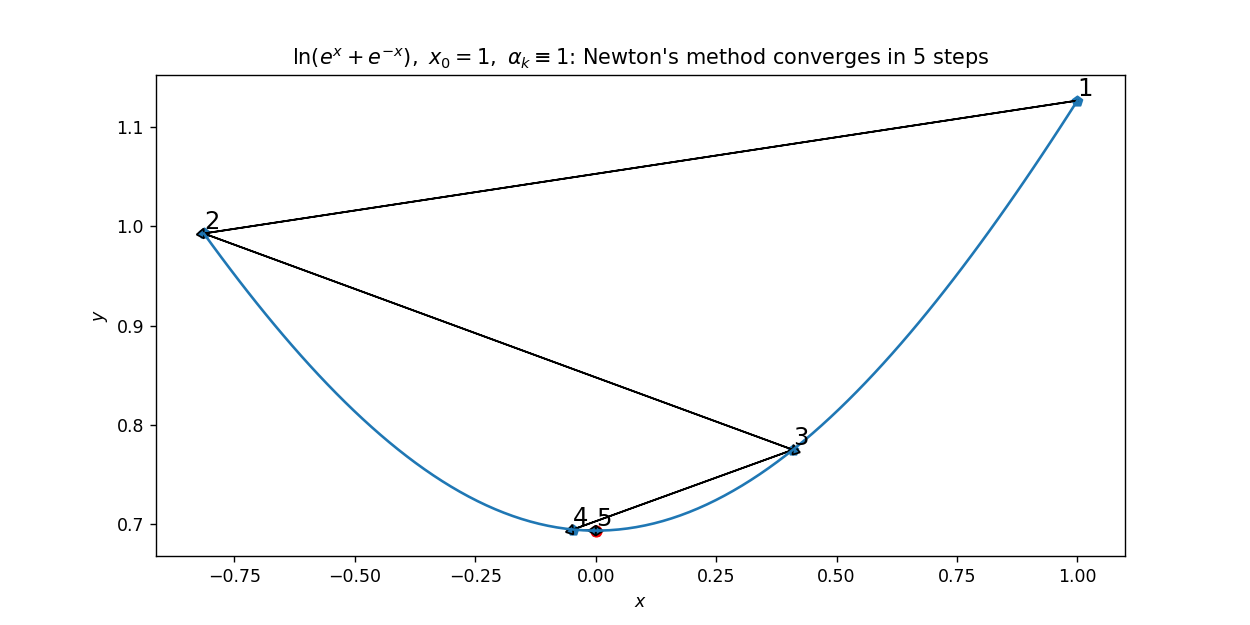

In [79]:
plot_convergence_1d(
    f, 
    steps_1_unit,
    title=r"$\ln(e^{x}+e^{-x}),\ x_0 = 1,\ \alpha_k \equiv 1$: Newton's method converges in 5 steps",
    arrow_kwargs={"width" : 0.0001, "head_width" : 0.01}
)

In [80]:
%%time
steps_1_1_unit, gradnorms["1_1_unit"] = opt_newton_1d(
    f, grad, hess,
    step_size=unit_step_size,
    x0=1.1
)
print(steps_1_1_unit)

[[  1.10000000e+00   1.20508332e+00]
 [ -1.12855259e+00   1.22808384e+00]
 [  1.23413113e+00   1.31546406e+00]
 [ -1.69516598e+00   1.72830815e+00]
 [  5.71536010e+00   5.71537096e+00]
 [ -2.30213565e+04              inf]
 [             inf              inf]
 [             nan              nan]]
CPU times: user 6.36 ms, sys: 0 ns, total: 6.36 ms
Wall time: 4.89 ms


/home/common/ivanov.vv/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/home/common/ivanov.vv/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in cosh
  
/home/common/ivanov.vv/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/common/ivanov.vv/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


<IPython.core.display.Javascript object>


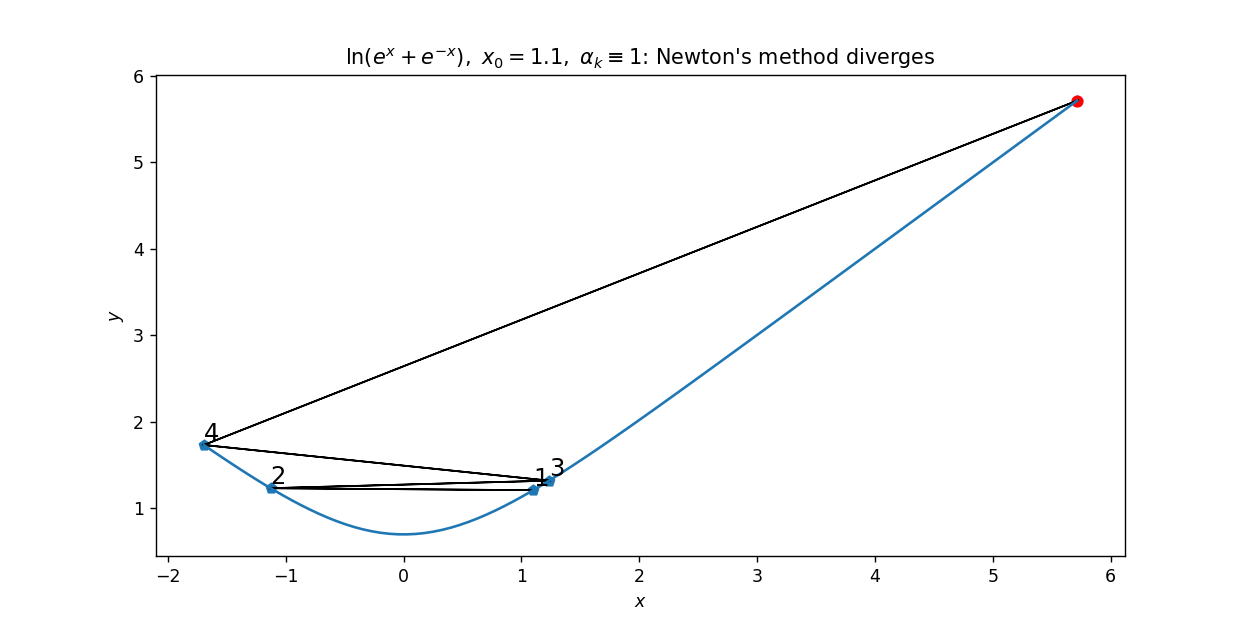

In [81]:
plot_convergence_1d(
    f,
    steps_1_1_unit[:-3,:],
    title=r"$\ln(e^{x}+e^{-x}),\ x_0 = 1.1,\ \alpha_k \equiv 1$: Newton's method diverges",
    arrow_kwargs={"width" : 0.0001, "head_width" : 0.01}
)

Видим, что метод Ньютона расходится, хотя точка очень близка к $x_0=1$. Посмотрим на зависимость направления от текущей точки:

<IPython.core.display.Javascript object>


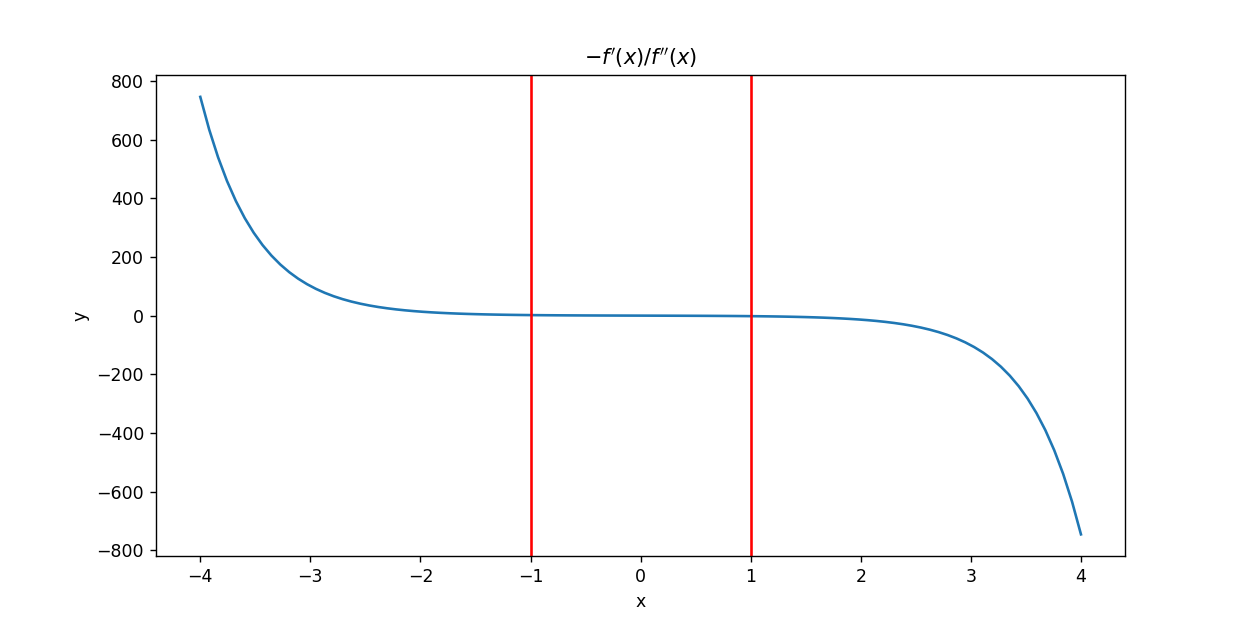

In [86]:
grid = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 5))
plt.title(r"$-f'(x)/f''(x)$")
plt.xlabel("x");
plt.ylabel("y");
plt.plot(grid, -grad(grid)/hess(grid));
for x in [-1, 1]:
    plt.axvline(x, color="r")

Видим, что за пределами отрезка $[-1, 1]$ норма направления начинает экспоненциально расти. Отсюда очевидно, что константный — плохая идея: нужно подбирать его так, чтобы скорость изменялась контролируемо, а убывание можно было гарантировать. Под такое описание хорошо подходит, к примеру, демпфированный по Армихо метод Ньютона:

In [83]:
%%time
steps_1_1_armijo, gradnorms["1_1_armijo"] = opt_newton_1d(
    f, grad, hess,
    step_size=partial(armijo_step_size_1d, 0.5, 0.03),
    x0=1.1
)
print(steps_1_1_armijo)

[[  1.10000000e+00   1.20508332e+00]
 [ -1.42762926e-02   6.93249083e-01]
 [  1.93987063e-06   6.93147181e-01]]
CPU times: user 747 µs, sys: 73 µs, total: 820 µs
Wall time: 686 µs


<IPython.core.display.Javascript object>


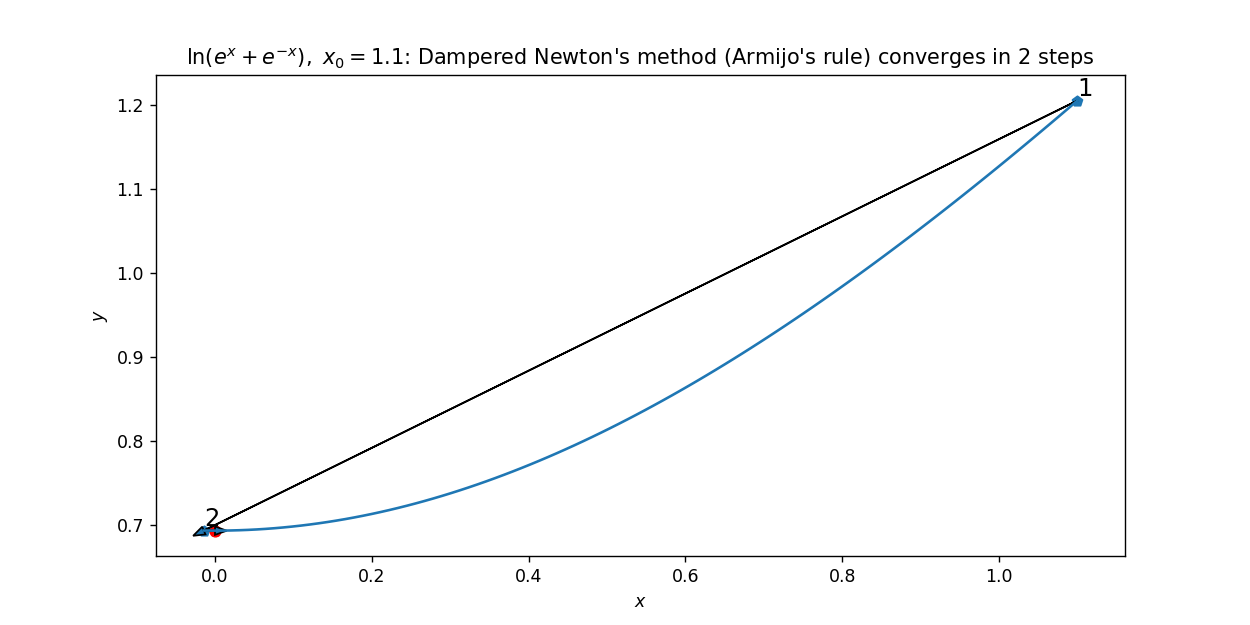

In [84]:
plot_convergence_1d(
    f,
    steps_1_1_armijo,
    title=r"$\ln(e^{x}+e^{-x}),\ x_0 = 1.1$: Dampered Newton's method (Armijo's rule) converges in 2 steps",
    arrow_kwargs={"width" : 0.0001, "head_width" : 0.01}
)

<IPython.core.display.Javascript object>


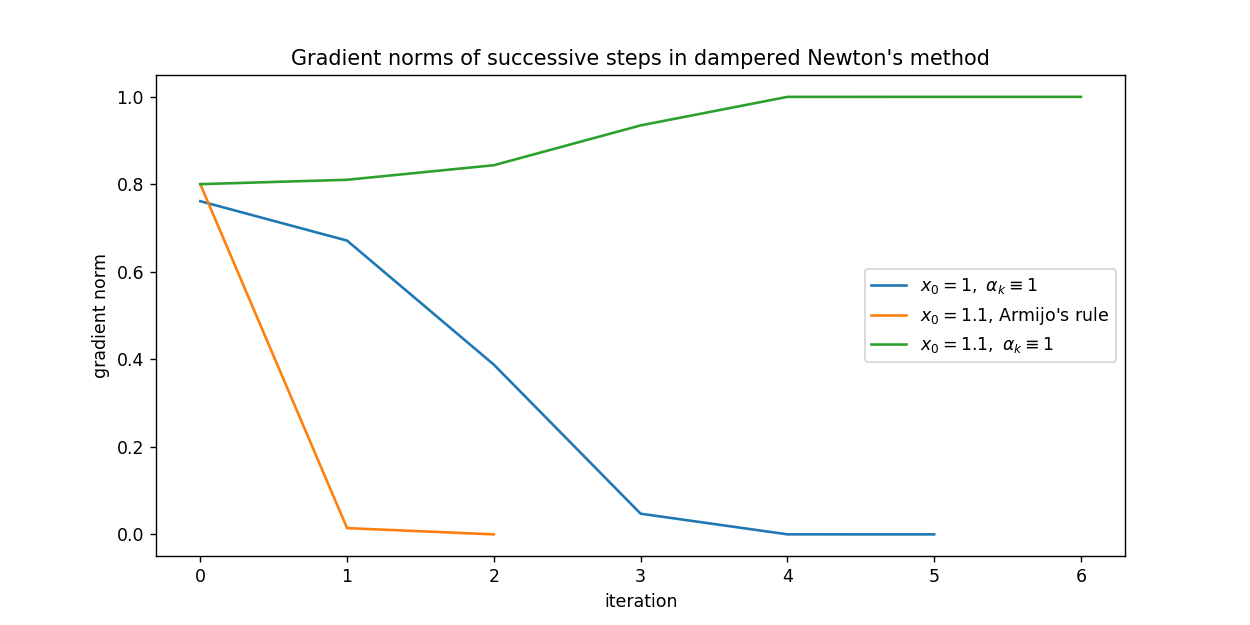

In [87]:
labels = {
    "1_unit" : r"$x_0 = 1,\ \alpha_k \equiv 1$",
    "1_1_unit" : r"$x_0 = 1.1,\ \alpha_k \equiv 1$",
    "1_1_armijo" : r"$x_0 = 1.1$, Armijo's rule"
}

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.title("Gradient norms of successive steps in dampered Newton's method")
for key, val in gradnorms.items():
    ax.plot(val, label=labels[key])
plt.xlabel("iteration")
plt.ylabel("gradient norm")
ax.legend()
plt.show()

## Задача 3
- Покажите, что преобразование DFP даёт положительно определённую оценку для гессиана $B_{k+1}$
- Выведите формулу для $H_k$ в методе DFP
- Реализуйте BFGS метод и сравните его сходимость с методом Ньютона для функции Розенброка из $x_0 = (-1.2, 1)$ и для задачи поиска аналитического центра. Попробуйте разные условия (достаточного убывания, существенного убывания, условие кривизны) для выбора шага $\alpha_k$ (сравните минимум два условия), всегда ли выполнялось условие $s^{\top}_k y_k > 0$?

In [10]:
# Место для Вашего решения

## Задача 4*

Предложите свой квазиньютоновский метод, реализуйте его и сравните скорость его сходимости (по времени и по итерациям) с методом Ньютона и с методом BFGS, который Вы реализовали в задаче 3. Обоснуйте (хотя бы в общих чертах), почему Ваш метод будет работать. 
Строгого доказательства я не требую, но мотивацию, которой Вы руководствовались, пожалуйста, приведите. 
Для вдохновения посморите, как строится метод Barzilai-Borwein и почему он собственно квазиньютоновский.

In [11]:
# Место для Вашего решения